<a href="https://colab.research.google.com/github/glauciodrumond/OracleCloud/blob/main/Project_Cloud_IAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.pngitem.com/pimgs/m/178-1789051_oracle-cloud-infrastructure-logo-hd-png-download.png" alt="drawing" width="600"/>

# O que é a Oracle Cloud Infrastructure?

Oracle Cloud Infrastructure(OCI) é a 2ª geração de serviços em Cloud da Oracle, otimizado para performance e segurança.

## Modelos de Deployment

### 1. Oracle Cloud @ Customer


*   Workloads no Data Center da empresa(on-premises)
*   Exadata (servidores)

### 2. Oracle Cloud Infrastructure (OCI)


*   Workloads no Data Center Público da Oracle Cloud(Region)






# **Recursos IAM na Console da OCI**

## Criando Compartments

**Step by Step**

Identity & Security -> Compartments

Click em _**Create Compartment**_ e crie conforme exemplo abaixo:

|Name | Description |
------|-------------
|recursosRede| Compartimento para armazenar recursos de Redes |
|recursosCompute| Compartimento para armazenar recursos de Compute |
|recursosDB| Compartimento para armazenar recursos de Banco de Dados |
|recursosArmazenamento| Compartimento para armazenar recursos de Armazenamento |



## Criando Groups

**Step by Step**

Identity & Security -> Domains -> Default -> Groups

Click em _**Create Group**_ e crie conforme exemplo abaixo:

Name | Description
-----| -----------
CloudAdmin | Usuarios com perfil de admin na tenancy
DBA | Usuarios com perfil de admin de banco de dados

## Criando Usuários
**Step by Step**

Identity & Security -> Domains -> Default -> Users

Click em _**Create User**_ 

Item | Obrigatorio?
-----| -----
First Name | **Optional**
Last Name |Required
Username | Required
Email | Required.


<br>
Obs.: Email pode ser usado como username, basta marcar a caixinha.

## Criando Polices
**Step by Step**

Identity & Security -> Policies

Click em _**Create Policy**_

Name | Description | Compartment
-----| ----------- | ------------ 
TenancyAdminPolicy | Permissão para gerir todos os recursos da tenancy | Root
DatabaseAdminPolicy | Permissão para gerir todos os recursos de Banco de Dados no compartimento recursosDB | Root

### Criando usando o Policy Builder
<br>

Clique em | Escolha
-----------------| ----------------------
Policy use cases | Compartment Management
Groups | CloudAdmin
Location | root

<br>**Policy Statements**

Allow group **'Default'/'CloudAdmin'** to manage all-resources in **tenancy drumondmulticloud (root)**

### Criando usando o Policy Builder Manual

<br>**Policy Statements**

Allow group **DBA** to manage database-family in **compartment recursosDB**

# **PROJETO CLOUD IMPLEMENTAÇÃO IAM**

_IMPLEMENTAÇÃO DE USUÁRIOS, GRUPOS E POLÍTICAS DE FORMA100% AUTOMATIZADA UTILIZANDO O ANSIBLE E CLOUD SHELL_




## Contextualização

Imagina que você é um Especialista em Cloud e surgiu uma demanda compartilhada pelo seu Gestor de realizar a criação de **usuários, grupos e políticas** na Oracle Cloud Infrastructure. 

<br>Ele recomendou você ter o **pensamento em escala** e fazer uso de uma ferramenta poderosa chamada [**Ansible**](https://docs.ansible.com/ansible/latest/user_guide/playbooks_intro.html), visando criar demaneira rápida,simples e **100% automatizada** todos os recursos do IAM.

<br>Seguindo dessa forma,no futuro ao surgir uma demanda de criação de novos usuários na OCI,você terá a possibilidadede **otimizar** muito o seu tempo com essa demanda,sendo necessário apenas indicar os recursos que deseja criar.

<br>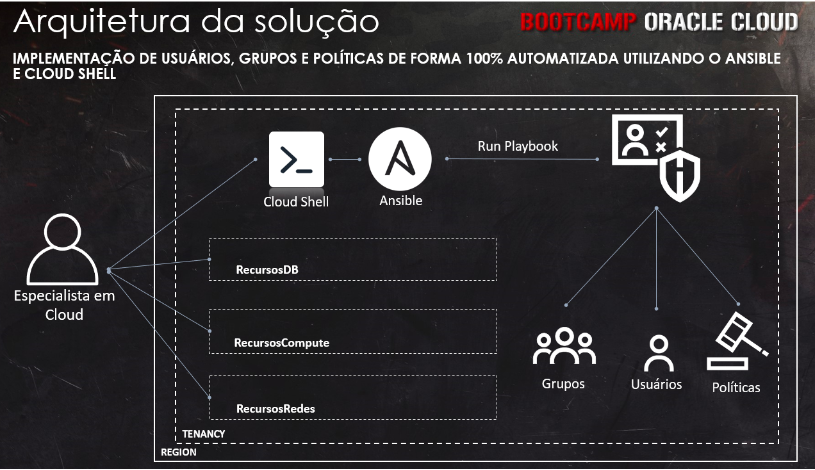



### Step 1

Criar os compartimentos no **Console OCI**



* RecursosRedes
* RecursosCompute
* RecursosDB

### Step 2

###**Abrir o Cloud Shell OCI**
Atualizar as linhas abaixo, inserindo a OCID da tenancy e dos compartments: RecursosRedes, RecursosCompute e RecursosDB:
<br>

---


```
* export PARENT_COMPARTMENT_OCID= _inserir-ocid_

* export COMPUTE_COMPARTMENT_OCID=_inserir-ocid_

* export REDES_COMPARTMENT_OCID= _inserir-ocid_

* export DB_COMPARTMENT_OCID= _inserir-ocid_
```


<br> Acesse **Compartments** na coluna OCID coloque o mouse sobre e aparecera **copy**

### Step 3

###**Ainda no Cloud Shell da OCI**
Criar e acessar a pasta para armazenar o código
<br>



---
<br>`mkdir tcb-bmc-iam` -> cria pasta tcb-bmc-iam 
<br> `cd tcb-bmc-iam` -> acessar a pasta

### Step 4

###**Ainda no Cloud Shell da OCI**
Fazer download do arquivo tcb-bmc-iam.yaml e descompactar.
<br>

---
```
1. wget (https://objectstorage.us-ashburn-1.oraclecloud.com/p/JwXwD1vHS3yOm79o1LQUctIXMw9ZryXR5BQ9o6fLbv2zhpyDvIVkGiw6tQItN3Vn/n/idqfa2z2mift/b/bootcamp-oci/o/oci-f-handson-modulo-iam.zip)
2. unzip oci-f-handson-modulo-iam.zip
```

### Step 5

###**Ainda no Cloud Shell da OCI**
Executar o playbook
<br>

---
```
1. ansible-playbook tcb-bmc-iam-cria-grupos-e-politicas.yaml
2. ansible-playbook tcb-bmc-iam-cria-usuarios-cloud-admin.yaml
3. ansible-playbook tcb-bmc-iam-cria-usuarios-dba-admin.yaml
4. ansible-playbook tcb-bmc-iam-cria-usuarios-redes-admin.yaml
5. ansible-playbook tcb-bmc-iam-cria-usuarios-compute-admin.yaml
6. ansible-playbook tcb-bmc-iam-cria-usuarios-operadores.yaml
```

# DESAFIO ANSIBLECRY

Pré-requisito: concluir o módulo 2 do Bootcamp Oracle Cloud.

## Curiosidade

Qual o motivo da escolha do nome Ansiblecry? <br> Devido muitas pessoas hoje chorarem quando fazem contato com o **Ansible** no campo de batalha. <br>Falam assim: "Meu Deus do céu, isso aqui éum mostro na minha frente. Eu vou chorar." Porém, um Bootcamper, de forma alguma, pode ter esse pensamento. #pracima


## Descrição

Durante o Projeto Cloud Implementação IAM, ao executar os playbooks para criação dosrecursos IAM de forma automatizada na Oracle Cloud Infrastructure, você perceberá que o código, propositalmente, fará a criação dos usuários, grupos, irá adicionar o usuário no seurespectivo grupo, criará a senha do usuário e vai printar a senha na console, para que você,por exemplo, compartilhe a senha pro usuário.

<br>Só que pensa no seguinte cenário. Imagina que você tivesse que fazer isso para 200 usuários.Será que para cada 1 desses 200 usuários, você enviaria o usuário e senha de forma manual?

<br>Seria essa a melhor forma de concluir essa atividade? A resposta, com toda certeza, é não. Não é dessa forma que você, Bootcamper, avançaria.

<br>Visto isso, a sua missão será pensar e ver como fazer para implementar no playbook um jeito de compartilhar o usuário e senha de forma automatizada por e-mail, para aquele usuário quefoi criado na Oracle Cloud Infrastructure.

<br>Preparado para iniciar? Com toda certeza, sim! Desejo sucesso no aprofundamento do seu conhecimento em Ansible. 

<br>Um excelente desafio. 

<br>Se lembre sempre: Para um Bootcamper, missão dada é missão cumprida. 

<br>#pracima


<img src="https://thetechviral.com/wp-content/uploads/2017/10/SendGrid-logo.jpg" alt="drawing" width="400"/>

<img src="https://blog.hyper.io/content/images/size/w2000/2021/02/ansible-wide.png" alt="drawing" width="400"/>

### Step 1

Crie uma conta na [SendGrid](sendgrid.com).
<br> 1. Clique Settings > API Keys
<br> 2. Create API Key
<br> 3. Coloque um nome para sua Key, marque **Full Acess** e clique em **Create & View**
<br> 4. Salve sua key


### Step 2

Implemente o arquivo `tcb-bmc-iam-cria-usuarios.yaml`

Adicione ao final do arquivo:
```
- name: Send an email using SENDGRID to inform USER and PASSWORD
  community.general.sendgrid:
    #username: "{{ sendgrid_username }}"
    #password: "{{ sendgrid_password }}"
    api_key: "from sendgridY"
    from_address: "email de quem esta enviando"
    to_addresses:
      - "{{ item }}{{ dominio }}"
    # - adm@gmail.com -> opcional adicionar email para ver se a app funcionou
    subject: "TCB OCI - Seu nome de usuário e senha."
    body: "Seu nome de usuário é '{{ item }}' e sua nova senha é '{{ user_password }}'."
  delegate_to: localhost
  when: criacaousuario.changed
```



### Step 3
 Nos outros arquivos cria usuarios adicione a variável sendgrid abaixo de `parent_compartment_ocid`

 Conforme exemplo abaixo:

 ```
 vars:
    parent_compartment_ocid: "{{ lookup('env', 'PARENT_COMPARTMENT_OCID') }}"
    sengrid_api_key: "{{ lookup('env', 'SENDGRID_API_KEY') }}"
 ```

### Step 4

Rodar os playbooks!